In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
from sklearn.metrics import 


from jupyterthemes import jtplot
jtplot.style()


import explore

plt.rcParams['figure.figsize'] = (4, 2)

# Analyzing and predicting customer churn
## Key findings:
-
- 

# Data acquisition and prep
- Data acquired from zillow sql database
- Dropped redundant columns
- 11 blank fields in total_charges where tenure == 0, fields filled with monthly_charges value then turned to float dtype
- encoded all object data type columns for easier feeding to ML models

In [2]:
telco = get_telco_data()
telco = clean_telco(telco)
telco.to_csv('telco_clean.csv')

In [3]:
telco.head(1)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner,dependents,phone_service,paperless_billing,...,Month_to_month,One_year_contract,Two_year_contract,DSL,Fiber_optic,No_internet,Bank_transfer_(automatic),Credit_card_(automatic),Electronic_check,Mailed_check
0,0003-MKNFE,0,9,59.9,542.4,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [4]:
#splitting data
train, validate, test = explore.train_validate_test_split(telco,'churn', seed=123)
train.shape, validate.shape, test.shape

((3943, 28), (1691, 28), (1409, 28))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5670 to 6867
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                3943 non-null   object 
 1   senior_citizen             3943 non-null   int64  
 2   tenure                     3943 non-null   int64  
 3   monthly_charges            3943 non-null   float64
 4   total_charges              3943 non-null   float64
 5   gender_Male                3943 non-null   uint8  
 6   partner                    3943 non-null   uint8  
 7   dependents                 3943 non-null   uint8  
 8   phone_service              3943 non-null   uint8  
 9   paperless_billing          3943 non-null   uint8  
 10  churn                      3943 non-null   uint8  
 11  online_security            3943 non-null   uint8  
 12  online_backup              3943 non-null   uint8  
 13  device_protection          3943 non-null   ui

## Exploration

In [50]:
#splitting columns between categorical and quantitative for explore functions
cat_vars = ['gender_Male',
            'senior_citizen',
            'partner',
            'dependents',
            'phone_service',
            'paperless_billing',
            'churn',
            'online_security',
            'online_backup',
            'device_protection',
            'tech_support',
            'streaming_tv',
            'streaming_movies',
            'multiple_lines',
            'Month_to_month',
            'One_year_contract',
            'Two_year_contract',
            'DSL',
            'Fiber_optic',
            'No_internet',
            'Bank_transfer_(automatic)',
            'Credit_card_(automatic)',
            'Electronic_check',
            'Mailed_check']

quant_vars = ['tenure', 'monthly_charges', 'total_charges']

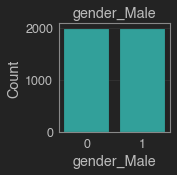

   gender_Male  Count  Percent
1            1   1979    50.19
0            0   1964    49.81
_________________________________________________________________


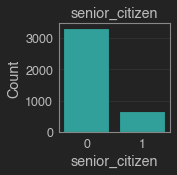

   senior_citizen  Count  Percent
0               0   3299    83.67
1               1    644    16.33
_________________________________________________________________


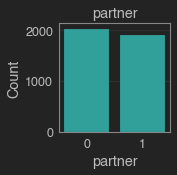

   partner  Count  Percent
0        0   2033    51.56
1        1   1910    48.44
_________________________________________________________________


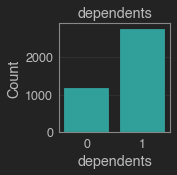

   dependents  Count  Percent
0           1   2764     70.1
1           0   1179     29.9
_________________________________________________________________


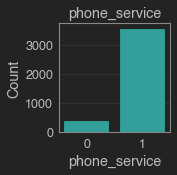

   phone_service  Count  Percent
1              1   3567    90.46
0              0    376     9.54
_________________________________________________________________


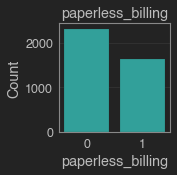

   paperless_billing  Count  Percent
1                  0   2310    58.58
0                  1   1633    41.42
_________________________________________________________________


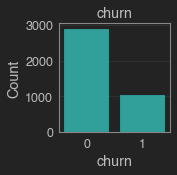

   churn  Count  Percent
0      0   2897    73.47
1      1   1046    26.53
_________________________________________________________________


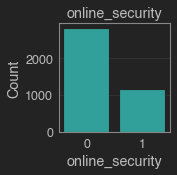

   online_security  Count  Percent
0                0   2804    71.11
1                1   1139    28.89
_________________________________________________________________


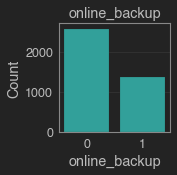

   online_backup  Count  Percent
0              0   2580    65.43
1              1   1363    34.57
_________________________________________________________________


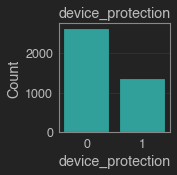

   device_protection  Count  Percent
0                  0   2610    66.19
1                  1   1333    33.81
_________________________________________________________________


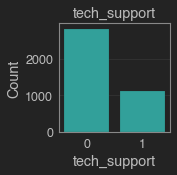

   tech_support  Count  Percent
0             0   2817    71.44
1             1   1126    28.56
_________________________________________________________________


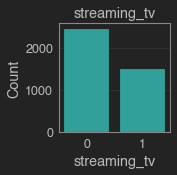

   streaming_tv  Count  Percent
0             0   2448    62.08
1             1   1495    37.92
_________________________________________________________________


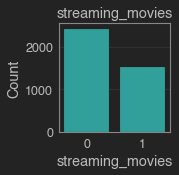

   streaming_movies  Count  Percent
0                 0   2417     61.3
1                 1   1526     38.7
_________________________________________________________________


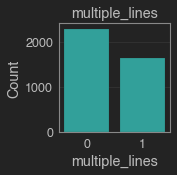

   multiple_lines  Count  Percent
0               0   2301    58.36
1               1   1642    41.64
_________________________________________________________________


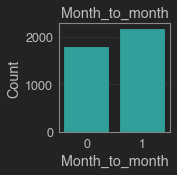

   Month_to_month  Count  Percent
1               1   2166    54.93
0               0   1777    45.07
_________________________________________________________________


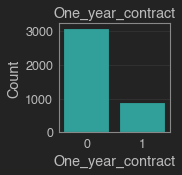

   One_year_contract  Count  Percent
0                  0   3074    77.96
1                  1    869    22.04
_________________________________________________________________


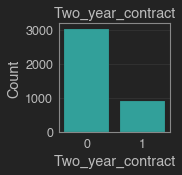

   Two_year_contract  Count  Percent
0                  0   3035    76.97
1                  1    908    23.03
_________________________________________________________________


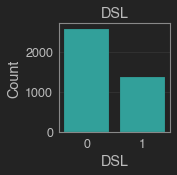

   DSL  Count  Percent
0    0   2578    65.38
1    1   1365    34.62
_________________________________________________________________


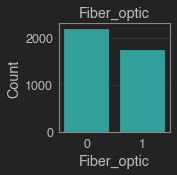

   Fiber_optic  Count  Percent
0            0   2203    55.87
1            1   1740    44.13
_________________________________________________________________


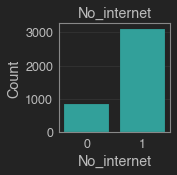

   No_internet  Count  Percent
0            1   3105    78.75
1            0    838    21.25
_________________________________________________________________


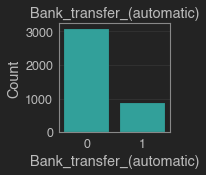

   Bank_transfer_(automatic)  Count  Percent
0                          0   3083    78.19
1                          1    860    21.81
_________________________________________________________________


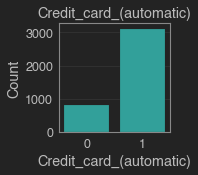

   Credit_card_(automatic)  Count  Percent
0                        1   3111     78.9
1                        0    832     21.1
_________________________________________________________________


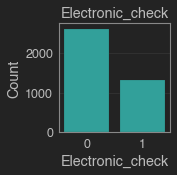

   Electronic_check  Count  Percent
0                 0   2615    66.32
1                 1   1328    33.68
_________________________________________________________________


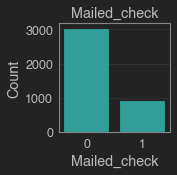

   Mailed_check  Count  Percent
0             0   3020    76.59
1             1    923    23.41
_________________________________________________________________


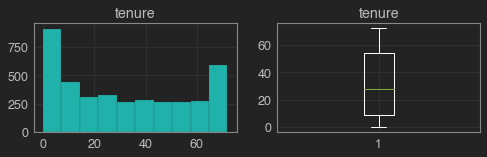

count    3943.000000
mean       31.931017
std        24.365751
min         0.000000
25%         9.000000
50%        28.000000
75%        54.000000
max        72.000000
Name: tenure, dtype: float64


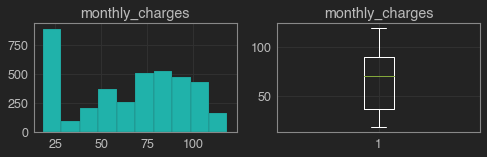

count    3943.000000
mean       64.823497
std        29.942691
min        18.250000
25%        36.350000
50%        70.150000
75%        89.750000
max       118.600000
Name: monthly_charges, dtype: float64


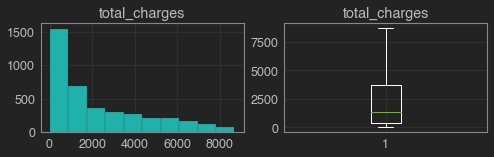

count    3943.000000
mean     2257.333794
std      2263.000426
min        18.800000
25%       400.700000
50%      1346.900000
75%      3722.775000
max      8684.800000
Name: total_charges, dtype: float64


In [51]:
#explore.py function to visualize single category data
explore.explore_univariate(train, cat_vars, quant_vars)

##### Univariate Takeaways
- 27% of total customers have churned
- Gender distribution is roughly 50/50
- Only 17% of customers are seniors
- 55% of total customers are on month-to-month contract type
- median tenure is 28 months

gender_Male 
_____________________

       chi2  p-value  degrees of freedom
0  0.156854  0.69207                   1

observed:
 churn           0     1   All
gender_Male                  
0            1437   527  1964
1            1460   519  1979
All          2897  1046  3943

expected:
              0           1
0  1442.989602  521.010398
1  1454.010398  524.989602


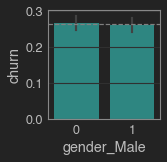


_____________________

senior_citizen 
_____________________

        chi2       p-value  degrees of freedom
0  57.427698  3.506345e-14                   1

observed:
 churn              0     1   All
senior_citizen                  
0               2502   797  3299
1                395   249   644
All             2897  1046  3943

expected:
              0           1
0  2423.840477  875.159523
1   473.159523  170.840477


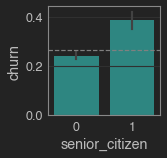


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  81.646173  1.627667e-19                   1

observed:
 churn       0     1   All
partner                  
0        1368   665  2033
1        1529   381  1910
All      2897  1046  3943

expected:
              0           1
0  1493.685265  539.314735
1  1403.314735  506.685265


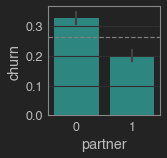


_____________________

dependents 
_____________________

        chi2       p-value  degrees of freedom
0  91.289781  1.240999e-21                   1

observed:
 churn          0     1   All
dependents                  
0           1909   855  2764
1            988   191  1179
All         2897  1046  3943

expected:
              0           1
0  2030.765407  733.234593
1   866.234593  312.765407


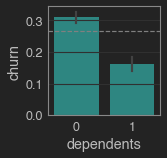


_____________________

phone_service 
_____________________

       chi2  p-value  degrees of freedom
0  0.158869   0.6902                   1

observed:
 churn             0     1   All
phone_service                  
0               280    96   376
1              2617   950  3567
All            2897  1046  3943

expected:
              0           1
0   276.254628   99.745372
1  2620.745372  946.254628


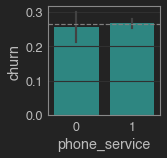


_____________________

paperless_billing 
_____________________

        chi2       p-value  degrees of freedom
0  140.22847  2.372755e-32                   1

observed:
 churn                 0     1   All
paperless_billing                  
0                  1362   271  1633
1                  1535   775  2310
All                2897  1046  3943

expected:
              0           1
0  1199.797362  433.202638
1  1697.202638  612.797362


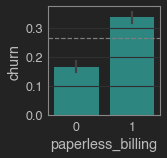


_____________________

churn 
_____________________

          chi2  p-value  degrees of freedom
0  3937.871007      0.0                   1

observed:
 churn     0     1   All
churn                  
0      2897     0  2897
1         0  1046  1046
All    2897  1046  3943

expected:
              0           1
0  2128.483135  768.516865
1   768.516865  277.483135


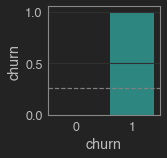


_____________________

online_security 
_____________________

         chi2       p-value  degrees of freedom
0  114.851907  8.479963e-27                   1

observed:
 churn               0     1   All
online_security                  
0                1925   879  2804
1                 972   167  1139
All              2897  1046  3943

expected:
              0           1
0  2060.154197  743.845803
1   836.845803  302.154197


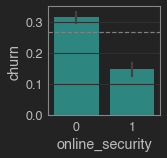


_____________________

online_backup 
_____________________

        chi2   p-value  degrees of freedom
0  13.856071  0.000197                   1

observed:
 churn             0     1   All
online_backup                  
0              1846   734  2580
1              1051   312  1363
All            2897  1046  3943

expected:
              0           1
0  1895.576972  684.423028
1  1001.423028  361.576972


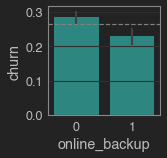


_____________________

device_protection 
_____________________

        chi2   p-value  degrees of freedom
0  16.406735  0.000051                   1

observed:
 churn                 0     1   All
device_protection                  
0                  1864   746  2610
1                  1033   300  1333
All                2897  1046  3943

expected:
              0           1
0  1917.618565  692.381435
1   979.381435  353.618565


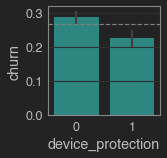


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  111.474188  4.658311e-26                   1

observed:
 churn            0     1   All
tech_support                  
0             1937   880  2817
1              960   166  1126
All           2897  1046  3943

expected:
              0           1
0  2069.705554  747.294446
1   827.294446  298.705554


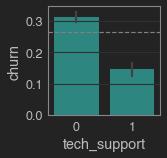


_____________________

streaming_tv 
_____________________

        chi2   p-value  degrees of freedom
0  14.324719  0.000154                   1

observed:
 churn            0     1   All
streaming_tv                  
0             1850   598  2448
1             1047   448  1495
All           2897  1046  3943

expected:
              0           1
0  1798.593964  649.406036
1  1098.406036  396.593964


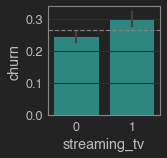


_____________________

streaming_movies 
_____________________

       chi2   p-value  degrees of freedom
0  9.992303  0.001572                   1

observed:
 churn                0     1   All
streaming_movies                  
0                 1819   598  2417
1                 1078   448  1526
All               2897  1046  3943

expected:
              0           1
0  1775.817652  641.182348
1  1121.182348  404.817652


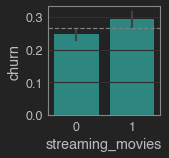


_____________________

multiple_lines 
_____________________

       chi2  p-value  degrees of freedom
0  5.115686  0.02371                   1

observed:
 churn              0     1   All
multiple_lines                  
0               1722   579  2301
1               1175   467  1642
All             2897  1046  3943

expected:
             0          1
0  1690.59016  610.40984
1  1206.40984  435.59016


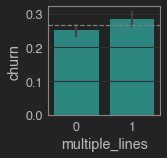


_____________________

Month_to_month 
_____________________

        chi2        p-value  degrees of freedom
0  607.24542  4.445065e-134                   1

observed:
 churn              0     1   All
Month_to_month                  
0               1646   131  1777
1               1251   915  2166
All             2897  1046  3943

expected:
              0           1
0  1305.597007  471.402993
1  1591.402993  574.597007


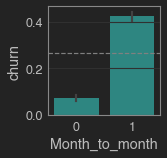


_____________________

One_year_contract 
_____________________

         chi2       p-value  degrees of freedom
0  114.627334  9.496796e-27                   1

observed:
 churn                 0     1   All
One_year_contract                  
0                  2135   939  3074
1                   762   107   869
All                2897  1046  3943

expected:
              0           1
0  2258.528532  815.471468
1   638.471468  230.528532


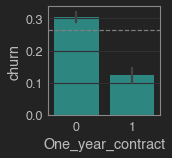


_____________________

Two_year_contract 
_____________________

         chi2       p-value  degrees of freedom
0  343.690562  1.002639e-76                   1

observed:
 churn                 0     1   All
Two_year_contract                  
0                  2013  1022  3035
1                   884    24   908
All                2897  1046  3943

expected:
              0           1
0  2229.874461  805.125539
1   667.125539  240.874461


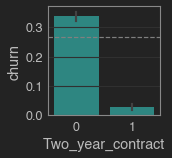


_____________________

DSL 
_____________________

        chi2       p-value  degrees of freedom
0  60.526153  7.260737e-15                   1

observed:
 churn     0     1   All
DSL                    
0      1791   787  2578
1      1106   259  1365
All    2897  1046  3943

expected:
              0           1
0  1894.107532  683.892468
1  1002.892468  362.107532


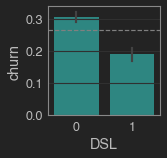


_____________________

Fiber_optic 
_____________________

         chi2       p-value  degrees of freedom
0  362.033241  1.015910e-80                   1

observed:
 churn           0     1   All
Fiber_optic                  
0            1881   322  2203
1            1016   724  1740
All          2897  1046  3943

expected:
              0           1
0  1618.587624  584.412376
1  1278.412376  461.587624


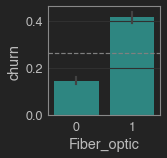


_____________________

No_internet 
_____________________

         chi2       p-value  degrees of freedom
0  196.074908  1.501123e-44                   1

observed:
 churn           0     1   All
No_internet                  
0            2122   983  3105
1             775    63   838
All          2897  1046  3943

expected:
              0           1
0  2281.304844  823.695156
1   615.695156  222.304844


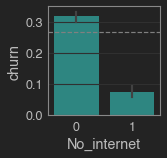


_____________________

Bank_transfer_(automatic) 
_____________________

        chi2       p-value  degrees of freedom
0  34.909878  3.453244e-09                   1

observed:
 churn                         0     1   All
Bank_transfer_(automatic)                  
0                          2197   886  3083
1                           700   160   860
All                        2897  1046  3943

expected:
              0           1
0  2265.141009  817.858991
1   631.858991  228.141009


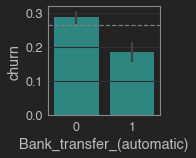


_____________________

Credit_card_(automatic) 
_____________________

        chi2       p-value  degrees of freedom
0  69.374518  8.143400e-17                   1

observed:
 churn                       0     1   All
Credit_card_(automatic)                  
0                        2191   920  3111
1                         706   126   832
All                      2897  1046  3943

expected:
              0           1
0  2285.713163  825.286837
1   611.286837  220.713163


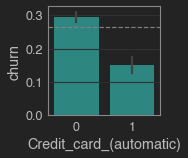


_____________________

Electronic_check 
_____________________

         chi2       p-value  degrees of freedom
0  319.545884  1.818937e-71                   1

observed:
 churn                0     1   All
Electronic_check                  
0                 2156   459  2615
1                  741   587  1328
All               2897  1046  3943

expected:
              0           1
0  1921.292163  693.707837
1   975.707837  352.292163


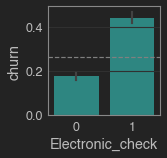


_____________________

Mailed_check 
_____________________

        chi2       p-value  degrees of freedom
0  36.950819  1.211468e-09                   1

observed:
 churn            0     1   All
Mailed_check                  
0             2147   873  3020
1              750   173   923
All           2897  1046  3943

expected:
              0           1
0  2218.853665  801.146335
1   678.146335  244.853665


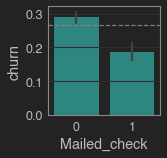


_____________________

tenure 
____________________



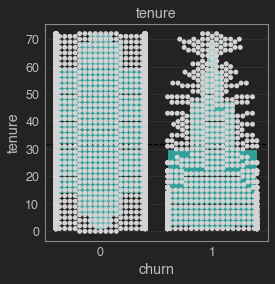

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  36.940283  23.962669  0.0  14.0  37.0  60.0  72.0
1      1046.0  18.057361  19.647335  1.0   2.0  10.0  30.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2225608.5, pvalue=2.4298450761804645e-112)

____________________

monthly_charges 
____________________



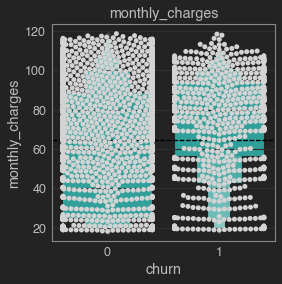

        count       mean        std    min      25%    50%    75%     max
churn                                                                    
0      2897.0  61.413997  30.890138  18.25  25.1500  64.60  88.40  118.60
1      1046.0  74.266444  24.823691  18.85  56.6625  79.65  94.25  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1156450.0, pvalue=6.206014591716352e-30)

____________________

total_charges 
____________________



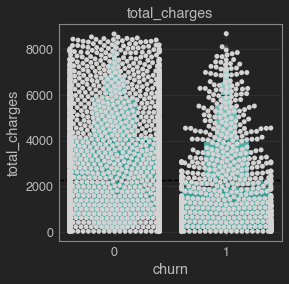

        count         mean          std    min       25%       50%       75%  \
churn                                                                          
0      2897.0  2518.957491  2324.599494  18.80  562.7000  1615.100  4144.900   
1      1046.0  1532.741205  1904.635962  18.85  114.5625   712.925  2319.125   

          max  
churn          
0      8670.1  
1      8684.8   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1964560.0, pvalue=5.093927002332789e-46)

____________________



In [8]:
#explore function to compare variables to the target of 'churn'
explore.explore_bivariate(train,'churn', cat_vars, quant_vars)

##### Bivariate Takeaways
- Month-to-month customers are churning at a higher rate than yearly contract customers
- Fiber optic customers churn at a higher rate than DSL and no internet customers
- 25% of churned customers have a tenure of 2 months
- Mean and median monthly charges for churned customers is ~25% higher than unchurned customers

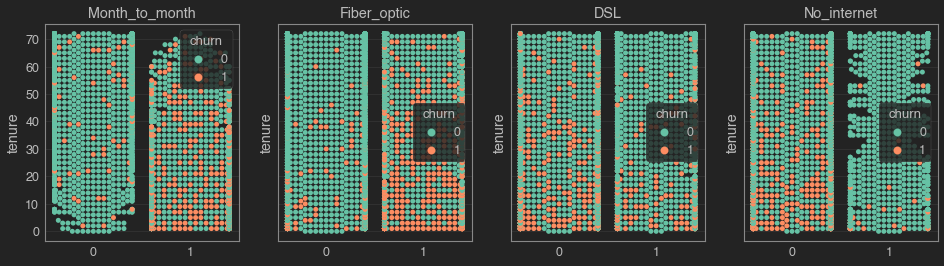

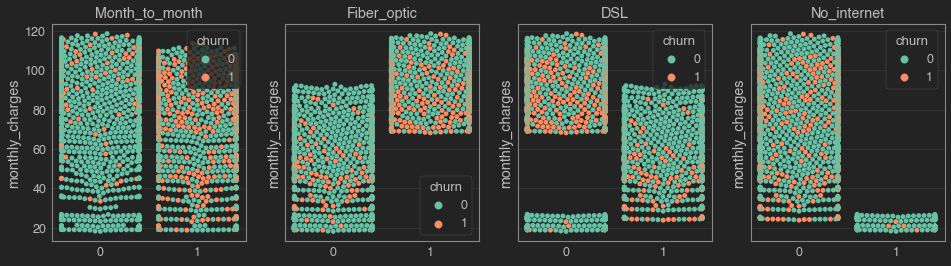

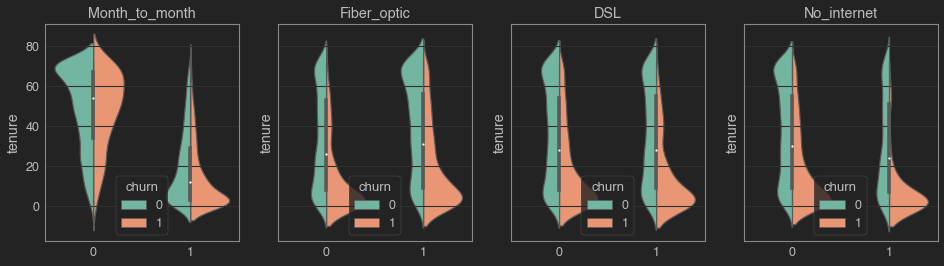

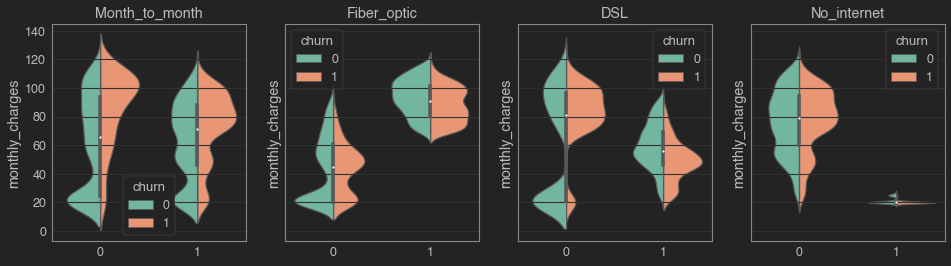

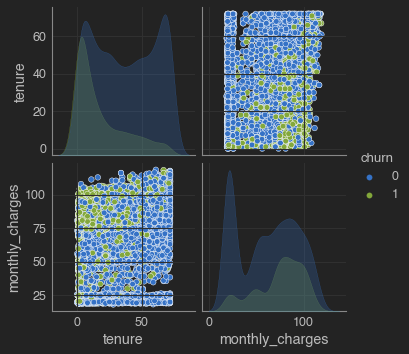

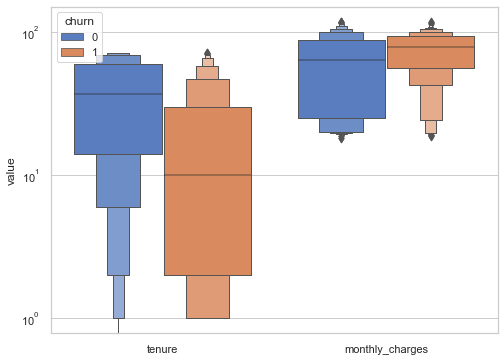

In [9]:
#Narrowing down variables for use with multivariate function. This function compares two categories and separates churn by hue
cat_vars = ['Month_to_month','Fiber_optic','DSL','No_internet']
quant_vars = ['tenure','monthly_charges']
explore.explore_multivariate(train,'churn', cat_vars,quant_vars)

##### Multivariate Takeaways
- Fiber optic customers have much higher minimum monthly charges than other customers
- Half of churned month-to-month customers paid over $70 a month for service

### 1. Are the monthly charges between churned customers significantly higher from unchurned customers?

In [10]:
null_hypothesis = "The means of monthly_charges are the same for churn vs. no churn"
alternative_hypothesis = "Churned customers had higher monthly_charges than unchurned"
confidence_level = .95
a = 1 - confidence_level 

In [13]:
#subsetting churned observations from train data
churned = train[train.churn == 1]
no_churn = train[train.churn == 0]
churned_fiber_optic = churned[churned.Fiber_optic == 1]

In [14]:
# % of total churned: month-to-month customers 87% , fiber optic customers 69%, % of churned month-to-month fiber optic customers 89%
(churned.Month_to_month == 1).mean(), (churned.Fiber_optic == 1).mean(), (churned_fiber_optic.Month_to_month == 1).mean()

(0.8747609942638623, 0.6921606118546845, 0.888121546961326)

In [15]:
# % of total churned, month-to-month fiber optic customers. 61% ot total churn
((churned.Month_to_month == 1) & (churned.Fiber_optic == 1)).mean()

0.6147227533460803

In [16]:
#one tailed two sample t-test for independence
t, p = stats.ttest_ind(churned.monthly_charges, no_churn.monthly_charges)
t, p

(12.117411797298109, 3.304107452529847e-33)

In [17]:
if (p/2) < a and t > 0:
    print("Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Reject the null hypothesis


In [18]:
print('The mean monthly charges for churned customers is significantly greater than unchurned')

The mean monthly charges for churned customers is significantly greater than unchurned


In [19]:
#verification: average monthly charges for churned customers is approximately 20% higher than unchurned on the train data set
churned.monthly_charges.mean(), no_churn.monthly_charges.mean()

(74.26644359464625, 61.41399723852254)

### 2. Is Churn independent of the Fiber Optic service?

In [20]:
null_hypothesis = "Churn is independent of the Fiber Optic service"
alternative_hypothesis = "Churn depends on Fiber Optic service subscription"
confidence_level = .95
a = 1 - confidence_level

In [21]:
observed = pd.crosstab(train.churn, train.Fiber_optic)
observed

Fiber_optic,0,1
churn,,
0,1881,1016
1,322,724


In [22]:
#chi2 test between two categorical variables
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(362.033240845499,
 1.0159095193215674e-80,
 1,
 array([[1618.58762364, 1278.41237636],
        [ 584.41237636,  461.58762364]]))

In [23]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


In [24]:
print('There is enough evidence to suggest that churn is dependent on whether the customer has Fiber Optic service or not')

There is enough evidence to suggest that churn is dependent on whether the customer has Fiber Optic service or not


### 3. Is there a correlation between monthly charges and tenure for churned fiber optic customers?

In [25]:
null_hypothesis = "There is no correlation between monthly charges and tenure for churned fiber optic customers"
alternative_hypothesis = "There is a positive correlation between monthly charges and tenure for churned fiber optic customers"
confidence_level = .95
a = 1 - confidence_level

#Pearson correlation test between two continuous variables
r, p = stats.pearsonr(churned_fiber_optic.tenure, churned_fiber_optic.monthly_charges)
r, p

(0.5733210518312353, 1.7002399713498668e-64)

In [26]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")
    
print('Pearson correlation = ', r)
print('There is a weak-moderate positive correlation between tenure and monthly charges for churned fiber optic customers')

We reject the null
Pearson correlation =  0.5733210518312353
There is a weak-moderate positive correlation between tenure and monthly charges for churned fiber optic customers


Text(12, 115, 'r = 0.573')

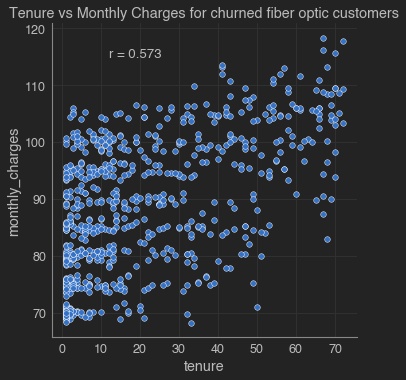

In [27]:
#correlation visualization
jtplot.style()

sns.relplot(x='tenure',y='monthly_charges',data=churned_fiber_optic)
plt.title('Tenure vs Monthly Charges for churned fiber optic customers')
plt.text(12,115, f'r = {r:.3f}')

# Modeling and Evaluation
- Creating all 4 types of classification models using mostly default settings then choosing the best performing
- get_metrics function from prepare.py

In [30]:
#setting baseline
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [31]:
#baseline is 0 == no churn
train['baseline_prediction'] = 0
train.head(1)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner,dependents,phone_service,paperless_billing,...,One_year_contract,Two_year_contract,DSL,Fiber_optic,No_internet,Bank_transfer_(automatic),Credit_card_(automatic),Electronic_check,Mailed_check,baseline_prediction
5670,2739-CCZMB,0,5,20.35,122.0,1,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0


In [32]:
baseline_accuracy = (train.churn == train.baseline_prediction).mean()
baseline_accuracy

0.7347197565305605

### Baseline accuracy ~ 73%

In [33]:
#Narrowing down features based on previous hypothesis testing. Partner and dependents were included just based on analysis from previous project
features = ['tenure','monthly_charges','partner','dependents','Month_to_month',
            'One_year_contract','Two_year_contract','DSL','Fiber_optic','No_internet']

X_train = train[features]
y_train = train.churn 

X_validate = validate[features]
y_validate = validate.churn

X_test = test[features]
y_test = test.churn

## Model 1: Decision Tree

In [34]:
clf = DecisionTreeClassifier(max_depth=5, random_state=123)
clf = clf.fit(X_train,y_train)

In [35]:
#training data report
decision_tree_report = get_metrics(clf, X_train, y_train)
decision_tree_report

confusion matrix: 
 [[2630  267]
 [ 515  531]]


    The accuracy for our model is 0.8017
    The True Positive Rate is 0.508, The False Positive Rate is 0.0922,
    The True Negative Rate is 0.908, and the False Negative Rate is 0.492
    


,precision,recall,f1-score,support
0,0.836248,0.907836,0.870573,2897.000000
1,0.665414,0.507648,0.575922,1046.000000
accuracy,0.801674,0.801674,0.801674,0.801674
macro avg,0.750831,0.707742,0.723247,3943.000000
weighted avg,0.790929,0.801674,0.792408,3943.000000


In [36]:
#validate data report
decision_tree_report_validate = get_metrics(clf,X_validate,y_validate)
decision_tree_report_validate

confusion matrix: 
 [[1129  113]
 [ 246  203]]


    The accuracy for our model is 0.7877
    The True Positive Rate is 0.452, The False Positive Rate is 0.091,
    The True Negative Rate is 0.909, and the False Negative Rate is 0.548
    


,precision,recall,f1-score,support
0,0.821091,0.909018,0.862820,1242.0000
1,0.642405,0.452116,0.530719,449.0000
accuracy,0.787700,0.787700,0.787700,0.7877
macro avg,0.731748,0.680567,0.696769,1691.0000
weighted avg,0.773646,0.787700,0.774639,1691.0000


## Model 2: Random Forest

In [37]:
rf = RandomForestClassifier(bootstrap=True,
                            class_weight=None,
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=5,
                            random_state=123)
rf = rf.fit(X_train, y_train)

In [38]:
#training data report
rf_report = get_metrics(rf,X_train,y_train)
rf_report

confusion matrix: 
 [[2688  209]
 [ 616  430]]


    The accuracy for our model is 0.7908
    The True Positive Rate is 0.411, The False Positive Rate is 0.0721,
    The True Negative Rate is 0.928, and the False Negative Rate is 0.589
    


,precision,recall,f1-score,support
0,0.813559,0.927856,0.866957,2897.000000
1,0.672926,0.411090,0.510386,1046.000000
accuracy,0.790768,0.790768,0.790768,0.790768
macro avg,0.743243,0.669473,0.688671,3943.000000
weighted avg,0.776252,0.790768,0.772366,3943.000000


In [39]:
#validate data report
rf_report_validate = get_metrics(rf,X_validate,y_validate)
rf_report_validate

confusion matrix: 
 [[1167   75]
 [ 276  173]]


    The accuracy for our model is 0.7924
    The True Positive Rate is 0.385, The False Positive Rate is 0.0604,
    The True Negative Rate is 0.94, and the False Negative Rate is 0.615
    


,precision,recall,f1-score,support
0,0.808732,0.939614,0.869274,1242.000000
1,0.697581,0.385301,0.496413,449.000000
accuracy,0.792431,0.792431,0.792431,0.792431
macro avg,0.753156,0.662457,0.682843,1691.000000
weighted avg,0.779219,0.792431,0.770271,1691.000000


## Model 3: KNN

In [40]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

#training data report
knn_report = get_metrics(knn,X_train,y_train)
knn_report

confusion matrix: 
 [[2797  100]
 [ 543  503]]


    The accuracy for our model is 0.8369
    The True Positive Rate is 0.481, The False Positive Rate is 0.0345,
    The True Negative Rate is 0.965, and the False Negative Rate is 0.519
    


,precision,recall,f1-score,support
0,0.837425,0.965482,0.896906,2897.000000
1,0.834163,0.480880,0.610067,1046.000000
accuracy,0.836926,0.836926,0.836926,0.836926
macro avg,0.835794,0.723181,0.753486,3943.000000
weighted avg,0.836560,0.836926,0.820813,3943.000000


In [41]:
#validate data report
knn_report_validate = get_metrics(knn,X_validate,y_validate)
knn_report_validate

confusion matrix: 
 [[1136  106]
 [ 285  164]]


    The accuracy for our model is 0.7688
    The True Positive Rate is 0.365, The False Positive Rate is 0.0853,
    The True Negative Rate is 0.915, and the False Negative Rate is 0.635
    


,precision,recall,f1-score,support
0,0.799437,0.914654,0.853173,1242.000000
1,0.607407,0.365256,0.456189,449.000000
accuracy,0.768776,0.768776,0.768776,0.768776
macro avg,0.703422,0.639955,0.654681,1691.000000
weighted avg,0.748449,0.768776,0.747765,1691.000000


## Model 4: Logistic Regression

In [42]:
logit = LogisticRegression(C=1, class_weight='balanced',
                           random_state=123,solver='liblinear')
logit = logit.fit(X_train, y_train)

#training data report
log_report = get_metrics(logit,X_train,y_train)
log_report

confusion matrix: 
 [[2023  874]
 [ 219  827]]


    The accuracy for our model is 0.7228
    The True Positive Rate is 0.791, The False Positive Rate is 0.302,
    The True Negative Rate is 0.698, and the False Negative Rate is 0.209
    


,precision,recall,f1-score,support
0,0.902319,0.698309,0.787313,2897.0000
1,0.486185,0.790631,0.602111,1046.0000
accuracy,0.722800,0.722800,0.722800,0.7228
macro avg,0.694252,0.744470,0.694712,3943.0000
weighted avg,0.791927,0.722800,0.738182,3943.0000


In [43]:
#validate data report
log_report_validate = get_metrics(logit,X_validate,y_validate)
log_report_validate

confusion matrix: 
 [[878 364]
 [ 82 367]]


    The accuracy for our model is 0.7363
    The True Positive Rate is 0.817, The False Positive Rate is 0.293,
    The True Negative Rate is 0.707, and the False Negative Rate is 0.183
    


,precision,recall,f1-score,support
0,0.914583,0.706924,0.797457,1242.000000
1,0.502052,0.817372,0.622034,449.000000
accuracy,0.736251,0.736251,0.736251,0.736251
macro avg,0.708318,0.762148,0.709745,1691.000000
weighted avg,0.805047,0.736251,0.750878,1691.000000


# Logistic Regression model chosen for it's high recall compared to other models
- False negative churn predictions are more costly so a high recall is necessary

In [44]:
#test data report
log_report_test = get_metrics(logit, X_test,y_test)
log_report_test

confusion matrix: 
 [[734 301]
 [ 69 305]]


    The accuracy for our model is 0.7374
    The True Positive Rate is 0.816, The False Positive Rate is 0.291,
    The True Negative Rate is 0.709, and the False Negative Rate is 0.184
    


,precision,recall,f1-score,support
0,0.914072,0.709179,0.798694,1035.000000
1,0.503300,0.815508,0.622449,374.000000
accuracy,0.737402,0.737402,0.737402,0.737402
macro avg,0.708686,0.762343,0.710572,1409.000000
weighted avg,0.805038,0.737402,0.751912,1409.000000


In [57]:
#creating churn predictions and probabilities using test dataset and log model and outputing to .csv
telco_predict = telco[features]
prediction = logit.predict(telco_predict)
prediction_probability = logit.predict_proba(telco_predict)
prediction, prediction_probability

(array([1, 1, 1, ..., 0, 0, 0], dtype=uint8),
 array([[0.38628834, 0.61371166],
        [0.41866754, 0.58133246],
        [0.38121015, 0.61878985],
        ...,
        [0.98594895, 0.01405105],
        [0.9868128 , 0.0131872 ],
        [0.97594801, 0.02405199]]))

In [58]:
#new predictions dataframe
predicted_df = pd.concat([telco.customer_id,pd.DataFrame(prediction_probability[0:,1]),pd.DataFrame(prediction)],axis=1)
predicted_df.columns = ['customer_id', 'probability_of_churn', 'churn_prediction']
predicted_df

,customer_id,probability_of_churn,churn_prediction
0,0003-MKNFE,0.613712,1
1,0013-MHZWF,0.581332,1
2,0015-UOCOJ,0.618790,1
3,0023-HGHWL,0.642549,1
4,0032-PGELS,0.594264,1
...,...,...,...
7038,9950-MTGYX,0.039994,0
7039,9953-ZMKSM,0.018736,0
7040,9964-WBQDJ,0.014051,0
7041,9972-EWRJS,0.013187,0


In [47]:
predicted_df.to_csv('churn_predictions.csv')

In [59]:
#accuracy of predictions compared to actual churn
(telco.churn == predicted_df.churn_prediction).mean()

0.7289507312224904

# Key Takeaways
- We need to address the high rate of churn for our month-to-month and fiber optic customers
- Current models aren't much more accurate than baseline but logistic regression model had highest recall of 0.82
- With more time I would tweak each model to maximize performance and possibly add features